# **Imports**

In [126]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

import statsmodels.api as sm


# **For Google Colab (Only run on Colab)**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Load timeseries dataset
time_series_df = pd.read_csv('/content/drive/MyDrive/Group1017-source_code/datasets/time_series_by_suburb.csv')

# Load the suburb to zipcode mapping dataset
zipcode_df = pd.read_csv('/content/drive/MyDrive/Group1017-source_code/datasets/suburb_to_zipcode.csv')

# Load housing dataset
house_df = pd.read_csv('/content/drive/MyDrive/Group1017-source_code/datasets/housing_features_by_address.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **For JupyterNotebook or Local (Only run on local)**

In [ ]:
# Load timeseries dataset
time_series_df = pd.read_csv('datasets/time_series_by_suburb.csv')

# Load the suburb to zipcode mapping dataset
zipcode_df = pd.read_csv('datasets/suburb_to_zipcode.csv')

# Load housing dataset
house_df = pd.read_csv('datasets/housing_features_by_address.csv')

# **Data Processing**

## Data Cleaning

Such as handling missing value, dropping columns that arent needed

### ***Housing Price Time Series By Suburb***

In [6]:
time_series_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Change,Unnamed: 13,Unnamed: 14,Growth,Unnamed: 16,Unnamed: 17
0,Locality,2013,2014,2015,2016,2017,2018,2019,2020.0,2021.0,2022.0,2023.0,Prelim,22-23,13-23,PA,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,(%),(%),13-23,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(%),NaN,NaN
3,ABBOTSFORD,792500,862500,925000,1187500,1280000,1192500,1050000,1200000.0,1365000.0,1346000.0,1250000.0,1027500,-7,58,4.7,NaN,NaN
4,ABERFELDIE,947500,1045000,1207500,1300000,1471000,1498500,1390000,1520000.0,1858000.0,1900000.0,1631000.0,3900000,-14,72,5.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,YARRAM,190000,202500,245000,230000,225000,218000,240000,260000.0,360000.0,470000.0,395000.0,425000,-16,108,7.6,NaN,NaN
786,YARRAVILLE,696000,710000,810000,900500,1000000,1045000,971000,1030000.0,1185000.0,1210000.0,1100000.0,1112500,-9,58,4.7,NaN,NaN
787,YARRAWONGA,302500,297000,300500,320000,324500,345000,375000,456500.0,564500.0,670000.0,640000.0,637500,-4,112,7.8,NaN,NaN
788,YEA,260000,255000,260000,305000,385000,390000,435500,422500.0,570000.0,617500.0,550000.0,496000,-11,112,7.8,NaN,NaN


In [7]:
# Define the new column names
new_columns = ['Locality', 'drop', 'drop', 'drop', '2016', '2017', '2018', '2019',
               '2020', '2021', '2022', '2023', 'drop', '22-23', 'drop', 'drop', 'drop', 'drop']

# Rename the columns
time_series_df.columns = new_columns

# Drop the 'drop' columns
time_series_df = time_series_df.drop(columns=['drop'])

time_series_df

,Locality,2016,2017,2018,2019,2020,2021,2022,2023,22-23
0,Locality,2016,2017,2018,2019,2020.0,2021.0,2022.0,2023.0,22-23
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(%)
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABBOTSFORD,1187500,1280000,1192500,1050000,1200000.0,1365000.0,1346000.0,1250000.0,-7
4,ABERFELDIE,1300000,1471000,1498500,1390000,1520000.0,1858000.0,1900000.0,1631000.0,-14
...,...,...,...,...,...,...,...,...,...,...
785,YARRAM,230000,225000,218000,240000,260000.0,360000.0,470000.0,395000.0,-16
786,YARRAVILLE,900500,1000000,1045000,971000,1030000.0,1185000.0,1210000.0,1100000.0,-9
787,YARRAWONGA,320000,324500,345000,375000,456500.0,564500.0,670000.0,640000.0,-4
788,YEA,305000,385000,390000,435500,422500.0,570000.0,617500.0,550000.0,-11


In [8]:
# Drop rows with NaN values (which might occur after coercion of non-numeric strings)
time_series_df = time_series_df.dropna(how='any')

# Reset the index after dropping rows
time_series_df = time_series_df.drop(index=0)
time_series_df = time_series_df.reset_index(drop=True)

# Convert all columns except 'Locality' to numeric (forcing errors to NaN if any non-numeric values are present)
for col in time_series_df.columns[1:]:  # Exclude the first column, because its a repeat
    time_series_df[col] = pd.to_numeric(time_series_df[col], errors='coerce')

# Drop rows with any NaN values
time_series_df.dropna(inplace=True)

time_series_df.isna().sum()

,0
Locality,0
2016,0
2017,0
2018,0
2019,0
2020,0
2021,0
2022,0
2023,0
22-23,0


Feature Engineer

In [9]:
price_df = time_series_df.copy()
price_df

,Locality,2016,2017,2018,2019,2020,2021,2022,2023,22-23
0,ABBOTSFORD,1187500.0,1280000.0,1192500.0,1050000.0,1200000.0,1365000.0,1346000.0,1250000.0,-7
1,ABERFELDIE,1300000.0,1471000.0,1498500.0,1390000.0,1520000.0,1858000.0,1900000.0,1631000.0,-14
2,AINTREE,600000.0,571000.0,557500.0,575000.0,616000.0,713500.0,756000.0,748000.0,-1
3,AIREYS INLET,715000.0,737500.0,869000.0,985000.0,1132500.0,1775000.0,1725000.0,1675000.0,-3
4,AIRPORT WEST,742000.0,845000.0,845000.0,795000.0,812500.0,960000.0,911000.0,945000.0,4
...,...,...,...,...,...,...,...,...,...,...
782,YARRAM,230000.0,225000.0,218000.0,240000.0,260000.0,360000.0,470000.0,395000.0,-16
783,YARRAVILLE,900500.0,1000000.0,1045000.0,971000.0,1030000.0,1185000.0,1210000.0,1100000.0,-9
784,YARRAWONGA,320000.0,324500.0,345000.0,375000.0,456500.0,564500.0,670000.0,640000.0,-4
785,YEA,305000.0,385000.0,390000.0,435500.0,422500.0,570000.0,617500.0,550000.0,-11


In [10]:

# Set 'Locality' as the index
price_df.set_index('Locality', inplace=True)

# Calculate year-to-year percentage changes with rounding
for year in range(2016, 2023):  # Loop through 2013 to 2022
    next_year = year + 1
    price_df[f'{year}to{next_year}'] = round(((price_df[str(next_year)] - price_df[str(year)]) / price_df[str(year)]) * 100, 0)

# Reset the index 'Locality'
price_df.reset_index(inplace=True)

# Display the updated DataFrame with new columns
print(price_df)


         Locality       2016       2017       2018       2019       2020  \
0      ABBOTSFORD  1187500.0  1280000.0  1192500.0  1050000.0  1200000.0   
1      ABERFELDIE  1300000.0  1471000.0  1498500.0  1390000.0  1520000.0   
2         AINTREE   600000.0   571000.0   557500.0   575000.0   616000.0   
3    AIREYS INLET   715000.0   737500.0   869000.0   985000.0  1132500.0   
4    AIRPORT WEST   742000.0   845000.0   845000.0   795000.0   812500.0   
..            ...        ...        ...        ...        ...        ...   
776        YARRAM   230000.0   225000.0   218000.0   240000.0   260000.0   
777    YARRAVILLE   900500.0  1000000.0  1045000.0   971000.0  1030000.0   
778    YARRAWONGA   320000.0   324500.0   345000.0   375000.0   456500.0   
779           YEA   305000.0   385000.0   390000.0   435500.0   422500.0   
780        YINNAR   230000.0   270000.0   245000.0   255000.0   292500.0   

          2021       2022       2023  22-23  2016to2017  2017to2018  \
0    1365000.0  

In [11]:
#Drop columns
price_df = price_df.drop(columns=['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '22-23'])

price_df

,Locality,2016to2017,2017to2018,2018to2019,2019to2020,2020to2021,2021to2022,2022to2023
0,ABBOTSFORD,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0
1,ABERFELDIE,13.0,2.0,-7.0,9.0,22.0,2.0,-14.0
2,AINTREE,-5.0,-2.0,3.0,7.0,16.0,6.0,-1.0
3,AIREYS INLET,3.0,18.0,13.0,15.0,57.0,-3.0,-3.0
4,AIRPORT WEST,14.0,0.0,-6.0,2.0,18.0,-5.0,4.0
...,...,...,...,...,...,...,...,...
776,YARRAM,-2.0,-3.0,10.0,8.0,38.0,31.0,-16.0
777,YARRAVILLE,11.0,4.0,-7.0,6.0,15.0,2.0,-9.0
778,YARRAWONGA,1.0,6.0,9.0,22.0,24.0,19.0,-4.0
779,YEA,26.0,1.0,12.0,-3.0,35.0,8.0,-11.0


Merging with Zipcode

In [12]:
zipcode_df

,Suburb,State,Zip
0,AARONS PASS,NSW,2850
1,ABBA RIVER,WA,6280
2,ABBEY,WA,6280
3,ABBEYARD,VIC,3737
4,ABBEYARD,VIC,3737
...,...,...,...
16748,ZILLMERE,QLD,4034
16749,ZILZIE,QLD,4710
16750,ZUCCOLI,NT,832
16751,ZUMSTEINS,VIC,3401


In [13]:
#Drop all rows that are not "VIC"
zipcode_df = zipcode_df[zipcode_df['State'] == 'VIC'].reset_index(drop=True)

zipcode_df

,Suburb,State,Zip
0,ABBEYARD,VIC,3737
1,ABBEYARD,VIC,3737
2,ABBOTSFORD,VIC,3067
3,ABECKETT STREET,VIC,8006
4,ABERFELDIE,VIC,3040
...,...,...,...
3347,YUNDOOL,VIC,3727
3348,YUROKE,VIC,3063
3349,YUULONG,VIC,3237
3350,ZEERUST,VIC,3634


In [14]:
# Merge the two DataFrames based on the standardized locality
merged_df = pd.merge(price_df, zipcode_df, left_on='Locality', right_on='Suburb', how='left')

# Fill missing zip codes with a default value (like 'Unknown')
merged_df['Zip'] = merged_df['Zip'].fillna('Unknown')

merged_df

,Locality,2016to2017,2017to2018,2018to2019,2019to2020,2020to2021,2021to2022,2022to2023,Suburb,State,Zip
0,ABBOTSFORD,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0,ABBOTSFORD,VIC,3067.0
1,ABERFELDIE,13.0,2.0,-7.0,9.0,22.0,2.0,-14.0,ABERFELDIE,VIC,3040.0
2,AINTREE,-5.0,-2.0,3.0,7.0,16.0,6.0,-1.0,AINTREE,VIC,3336.0
3,AIREYS INLET,3.0,18.0,13.0,15.0,57.0,-3.0,-3.0,AIREYS INLET,VIC,3231.0
4,AIRPORT WEST,14.0,0.0,-6.0,2.0,18.0,-5.0,4.0,AIRPORT WEST,VIC,3042.0
...,...,...,...,...,...,...,...,...,...,...,...
990,YARRAVILLE,11.0,4.0,-7.0,6.0,15.0,2.0,-9.0,YARRAVILLE,VIC,3013.0
991,YARRAWONGA,1.0,6.0,9.0,22.0,24.0,19.0,-4.0,YARRAWONGA,VIC,3730.0
992,YARRAWONGA,1.0,6.0,9.0,22.0,24.0,19.0,-4.0,YARRAWONGA,VIC,3730.0
993,YEA,26.0,1.0,12.0,-3.0,35.0,8.0,-11.0,YEA,VIC,3717.0


In [15]:
# Remove rows with "Unknown" value in the Zip column
merged_df = merged_df[merged_df['Zip'] != 'Unknown']

# Ensure Zip column is not a string and convert it to numeric if it is
merged_df['Zip'] = pd.to_numeric(merged_df['Zip'], errors='coerce')

# Remove rows with null values in the 'Zip' column
merged_df = merged_df.dropna(subset=['Zip'])

# Convert 'Postcode' column to integer type
merged_df['Zip'] = merged_df['Zip'].astype(int)

# Rename Zip to Postcode
merged_df = merged_df.rename(columns={'Zip': 'Postcode'})

# Drop unnecessary columns
merged_df = merged_df.drop(['Locality', 'State', 'Suburb'], axis=1)

# Reset the index after removing rows
merged_df = merged_df.reset_index(drop=True)

merged_df

<ipython-input-15-2b7304b1eecd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Zip'] = pd.to_numeric(merged_df['Zip'], errors='coerce')


,2016to2017,2017to2018,2018to2019,2019to2020,2020to2021,2021to2022,2022to2023,Postcode
0,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0,3067
1,13.0,2.0,-7.0,9.0,22.0,2.0,-14.0,3040
2,-5.0,-2.0,3.0,7.0,16.0,6.0,-1.0,3336
3,3.0,18.0,13.0,15.0,57.0,-3.0,-3.0,3231
4,14.0,0.0,-6.0,2.0,18.0,-5.0,4.0,3042
...,...,...,...,...,...,...,...,...
822,11.0,4.0,-7.0,6.0,15.0,2.0,-9.0,3013
823,1.0,6.0,9.0,22.0,24.0,19.0,-4.0,3730
824,1.0,6.0,9.0,22.0,24.0,19.0,-4.0,3730
825,26.0,1.0,12.0,-3.0,35.0,8.0,-11.0,3717


### ***Housing Features by Address***

In [16]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [17]:
#Drop unnecessary columns
house_df = house_df.drop(['Suburb', 'Address', 'Rooms', 'Landsize', 'BuildingArea', 'Method', 'SellerG', 'Car', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'], axis=1)

house_df

,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,YearBuilt
0,h,NaN,3/09/2016,2.5,3067.0,2.0,1.0,NaN
1,h,1480000.0,3/12/2016,2.5,3067.0,2.0,1.0,NaN
2,h,1035000.0,4/02/2016,2.5,3067.0,2.0,1.0,1900.0
3,u,NaN,4/02/2016,2.5,3067.0,3.0,2.0,NaN
4,h,1465000.0,4/03/2017,2.5,3067.0,3.0,2.0,1900.0
...,...,...,...,...,...,...,...,...
34852,h,1480000.0,24/02/2018,6.3,3013.0,4.0,1.0,NaN
34853,h,888000.0,24/02/2018,6.3,3013.0,2.0,2.0,2018.0
34854,t,705000.0,24/02/2018,6.3,3013.0,2.0,1.0,2000.0
34855,h,1140000.0,24/02/2018,6.3,3013.0,NaN,NaN,NaN


In [18]:
#Convert Date (house sold) column to YearSold
house_df['YearSold'] = pd.to_datetime(house_df['Date'], format='%d/%m/%Y').dt.year

# Remove the original 'Date' column
house_df = house_df.drop('Date', axis=1)

# Rename column
house_df = house_df.rename(columns={'Distance': 'KMfromCBD'})
house_df = house_df.rename(columns={'Bedroom2': 'Bedroom'})

# One-hot-encode "Type" column
house_df['House'] = (house_df['Type'] == 'h').astype(int)
house_df['Unit'] = (house_df['Type'] == 'u').astype(int)
house_df['Townhouse'] = (house_df['Type'] == 't').astype(int)

# Remove the original 'Type' column
house_df = house_df.drop('Type', axis=1)

house_df

,Price,KMfromCBD,Postcode,Bedroom,Bathroom,YearBuilt,YearSold,House,Unit,Townhouse
0,NaN,2.5,3067.0,2.0,1.0,NaN,2016,1,0,0
1,1480000.0,2.5,3067.0,2.0,1.0,NaN,2016,1,0,0
2,1035000.0,2.5,3067.0,2.0,1.0,1900.0,2016,1,0,0
3,NaN,2.5,3067.0,3.0,2.0,NaN,2016,0,1,0
4,1465000.0,2.5,3067.0,3.0,2.0,1900.0,2017,1,0,0
...,...,...,...,...,...,...,...,...,...,...
34852,1480000.0,6.3,3013.0,4.0,1.0,NaN,2018,1,0,0
34853,888000.0,6.3,3013.0,2.0,2.0,2018.0,2018,1,0,0
34854,705000.0,6.3,3013.0,2.0,1.0,2000.0,2018,0,0,1
34855,1140000.0,6.3,3013.0,NaN,NaN,NaN,2018,1,0,0


In [19]:
# Handle missing values in relevant columns (filling with median or 0 as appropriate)
for column in ['Price', 'Bedroom', 'Bathroom', 'YearBuilt']:
    house_df[column].fillna(house_df[column].median(), inplace=True)

# Drop rows with any NaN values
house_df.dropna(inplace=True)

# Reset the index after cleaning
house_df = house_df.reset_index(drop=True)

# Check for any remaining null/nan values
print(house_df.isnull().sum())
print(house_df.isna().sum())

Price        0
KMfromCBD    0
Postcode     0
Bedroom      0
Bathroom     0
YearBuilt    0
YearSold     0
House        0
Unit         0
Townhouse    0
dtype: int64
Price        0
KMfromCBD    0
Postcode     0
Bedroom      0
Bathroom     0
YearBuilt    0
YearSold     0
House        0
Unit         0
Townhouse    0
dtype: int64


<ipython-input-19-8001761f75c3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_df[column].fillna(house_df[column].median(), inplace=True)


In [20]:
# Feature engineer
house_df['TotalRooms'] = house_df['Bedroom'] + house_df['Bathroom']
house_df['PricePerRoom'] = round(house_df['Price'] / house_df['TotalRooms'], 0)

In [21]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34856 entries, 0 to 34855
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         34856 non-null  float64
 1   KMfromCBD     34856 non-null  float64
 2   Postcode      34856 non-null  float64
 3   Bedroom       34856 non-null  float64
 4   Bathroom      34856 non-null  float64
 5   YearBuilt     34856 non-null  float64
 6   YearSold      34856 non-null  int32  
 7   House         34856 non-null  int64  
 8   Unit          34856 non-null  int64  
 9   Townhouse     34856 non-null  int64  
 10  TotalRooms    34856 non-null  float64
 11  PricePerRoom  34856 non-null  float64
dtypes: float64(8), int32(1), int64(3)
memory usage: 3.1 MB


In [22]:
house_df

,Price,KMfromCBD,Postcode,Bedroom,Bathroom,YearBuilt,YearSold,House,Unit,Townhouse,TotalRooms,PricePerRoom
0,870000.0,2.5,3067.0,2.0,1.0,1970.0,2016,1,0,0,3.0,290000.0
1,1480000.0,2.5,3067.0,2.0,1.0,1970.0,2016,1,0,0,3.0,493333.0
2,1035000.0,2.5,3067.0,2.0,1.0,1900.0,2016,1,0,0,3.0,345000.0
3,870000.0,2.5,3067.0,3.0,2.0,1970.0,2016,0,1,0,5.0,174000.0
4,1465000.0,2.5,3067.0,3.0,2.0,1900.0,2017,1,0,0,5.0,293000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34851,1480000.0,6.3,3013.0,4.0,1.0,1970.0,2018,1,0,0,5.0,296000.0
34852,888000.0,6.3,3013.0,2.0,2.0,2018.0,2018,1,0,0,4.0,222000.0
34853,705000.0,6.3,3013.0,2.0,1.0,2000.0,2018,0,0,1,3.0,235000.0
34854,1140000.0,6.3,3013.0,3.0,2.0,1970.0,2018,1,0,0,5.0,228000.0


## **Merging the two Dataframes**

In [23]:
#Load the dataframes

house_price = merged_df.copy()
house_features = house_df.copy()

In [24]:
house_price

,2016to2017,2017to2018,2018to2019,2019to2020,2020to2021,2021to2022,2022to2023,Postcode
0,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0,3067
1,13.0,2.0,-7.0,9.0,22.0,2.0,-14.0,3040
2,-5.0,-2.0,3.0,7.0,16.0,6.0,-1.0,3336
3,3.0,18.0,13.0,15.0,57.0,-3.0,-3.0,3231
4,14.0,0.0,-6.0,2.0,18.0,-5.0,4.0,3042
...,...,...,...,...,...,...,...,...
822,11.0,4.0,-7.0,6.0,15.0,2.0,-9.0,3013
823,1.0,6.0,9.0,22.0,24.0,19.0,-4.0,3730
824,1.0,6.0,9.0,22.0,24.0,19.0,-4.0,3730
825,26.0,1.0,12.0,-3.0,35.0,8.0,-11.0,3717


In [25]:
house_features = house_features[house_features['YearBuilt'] >= 1600]
house_features

,Price,KMfromCBD,Postcode,Bedroom,Bathroom,YearBuilt,YearSold,House,Unit,Townhouse,TotalRooms,PricePerRoom
0,870000.0,2.5,3067.0,2.0,1.0,1970.0,2016,1,0,0,3.0,290000.0
1,1480000.0,2.5,3067.0,2.0,1.0,1970.0,2016,1,0,0,3.0,493333.0
2,1035000.0,2.5,3067.0,2.0,1.0,1900.0,2016,1,0,0,3.0,345000.0
3,870000.0,2.5,3067.0,3.0,2.0,1970.0,2016,0,1,0,5.0,174000.0
4,1465000.0,2.5,3067.0,3.0,2.0,1900.0,2017,1,0,0,5.0,293000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34851,1480000.0,6.3,3013.0,4.0,1.0,1970.0,2018,1,0,0,5.0,296000.0
34852,888000.0,6.3,3013.0,2.0,2.0,2018.0,2018,1,0,0,4.0,222000.0
34853,705000.0,6.3,3013.0,2.0,1.0,2000.0,2018,0,0,1,3.0,235000.0
34854,1140000.0,6.3,3013.0,3.0,2.0,1970.0,2018,1,0,0,5.0,228000.0


In [26]:
# Merge the two DataFrames based on the 'Postcode' column
final_df = pd.merge(house_features, house_price, on='Postcode', how='left')

# Display the merged DataFrame
final_df

,Price,KMfromCBD,Postcode,Bedroom,Bathroom,YearBuilt,YearSold,House,Unit,Townhouse,TotalRooms,PricePerRoom,2016to2017,2017to2018,2018to2019,2019to2020,2020to2021,2021to2022,2022to2023
0,870000.0,2.5,3067.0,2.0,1.0,1970.0,2016,1,0,0,3.0,290000.0,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0
1,1480000.0,2.5,3067.0,2.0,1.0,1970.0,2016,1,0,0,3.0,493333.0,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0
2,1035000.0,2.5,3067.0,2.0,1.0,1900.0,2016,1,0,0,3.0,345000.0,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0
3,870000.0,2.5,3067.0,3.0,2.0,1970.0,2016,0,1,0,5.0,174000.0,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0
4,1465000.0,2.5,3067.0,3.0,2.0,1900.0,2017,1,0,0,5.0,293000.0,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77546,705000.0,6.3,3013.0,2.0,1.0,2000.0,2018,0,0,1,3.0,235000.0,11.0,4.0,-7.0,6.0,15.0,2.0,-9.0
77547,1140000.0,6.3,3013.0,3.0,2.0,1970.0,2018,1,0,0,5.0,228000.0,11.0,4.0,-7.0,6.0,15.0,2.0,-9.0
77548,1140000.0,6.3,3013.0,3.0,2.0,1970.0,2018,1,0,0,5.0,228000.0,11.0,4.0,-7.0,6.0,15.0,2.0,-9.0
77549,1020000.0,6.3,3013.0,2.0,1.0,1930.0,2018,1,0,0,3.0,340000.0,11.0,4.0,-7.0,6.0,15.0,2.0,-9.0


In [27]:
# Drop rows with any NaN values
final_df.dropna(inplace=True)

# Reset the index after dropping rows
final_df = final_df.reset_index(drop=True)

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73055 entries, 0 to 73054
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         73055 non-null  float64
 1   KMfromCBD     73055 non-null  float64
 2   Postcode      73055 non-null  float64
 3   Bedroom       73055 non-null  float64
 4   Bathroom      73055 non-null  float64
 5   YearBuilt     73055 non-null  float64
 6   YearSold      73055 non-null  int32  
 7   House         73055 non-null  int64  
 8   Unit          73055 non-null  int64  
 9   Townhouse     73055 non-null  int64  
 10  TotalRooms    73055 non-null  float64
 11  PricePerRoom  73055 non-null  float64
 12  2016to2017    73055 non-null  float64
 13  2017to2018    73055 non-null  float64
 14  2018to2019    73055 non-null  float64
 15  2019to2020    73055 non-null  float64
 16  2020to2021    73055 non-null  float64
 17  2021to2022    73055 non-null  float64
 18  2022to2023    73055 non-nu

# **Data Visualization**

In [131]:
data = final_df.copy()

## Data Analyze

In [132]:
data

,Price,KMfromCBD,Postcode,Bedroom,Bathroom,YearBuilt,YearSold,House,Unit,Townhouse,TotalRooms,PricePerRoom,2016to2017,2017to2018,2018to2019,2019to2020,2020to2021,2021to2022,2022to2023
0,870000.0,2.5,3067.0,2.0,1.0,1970.0,2016,1,0,0,3.0,290000.0,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0
1,1480000.0,2.5,3067.0,2.0,1.0,1970.0,2016,1,0,0,3.0,493333.0,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0
2,1035000.0,2.5,3067.0,2.0,1.0,1900.0,2016,1,0,0,3.0,345000.0,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0
3,870000.0,2.5,3067.0,3.0,2.0,1970.0,2016,0,1,0,5.0,174000.0,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0
4,1465000.0,2.5,3067.0,3.0,2.0,1900.0,2017,1,0,0,5.0,293000.0,8.0,-7.0,-12.0,14.0,14.0,-1.0,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73050,705000.0,6.3,3013.0,2.0,1.0,2000.0,2018,0,0,1,3.0,235000.0,11.0,4.0,-7.0,6.0,15.0,2.0,-9.0
73051,1140000.0,6.3,3013.0,3.0,2.0,1970.0,2018,1,0,0,5.0,228000.0,11.0,4.0,-7.0,6.0,15.0,2.0,-9.0
73052,1140000.0,6.3,3013.0,3.0,2.0,1970.0,2018,1,0,0,5.0,228000.0,11.0,4.0,-7.0,6.0,15.0,2.0,-9.0
73053,1020000.0,6.3,3013.0,2.0,1.0,1930.0,2018,1,0,0,3.0,340000.0,11.0,4.0,-7.0,6.0,15.0,2.0,-9.0


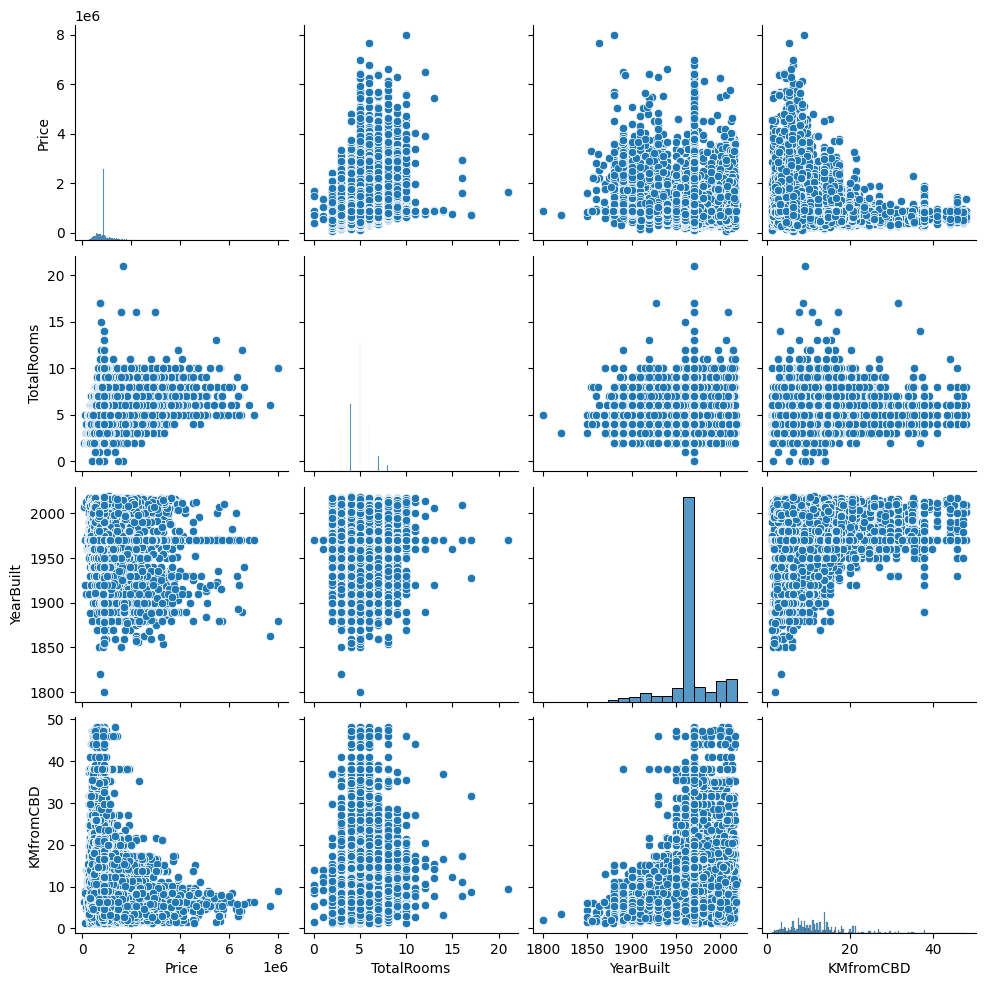

In [133]:
# Pairplot to visualize relationships between multiple variables
sns.pairplot(data[['Price', 'TotalRooms', 'YearBuilt', 'KMfromCBD']])
plt.show()

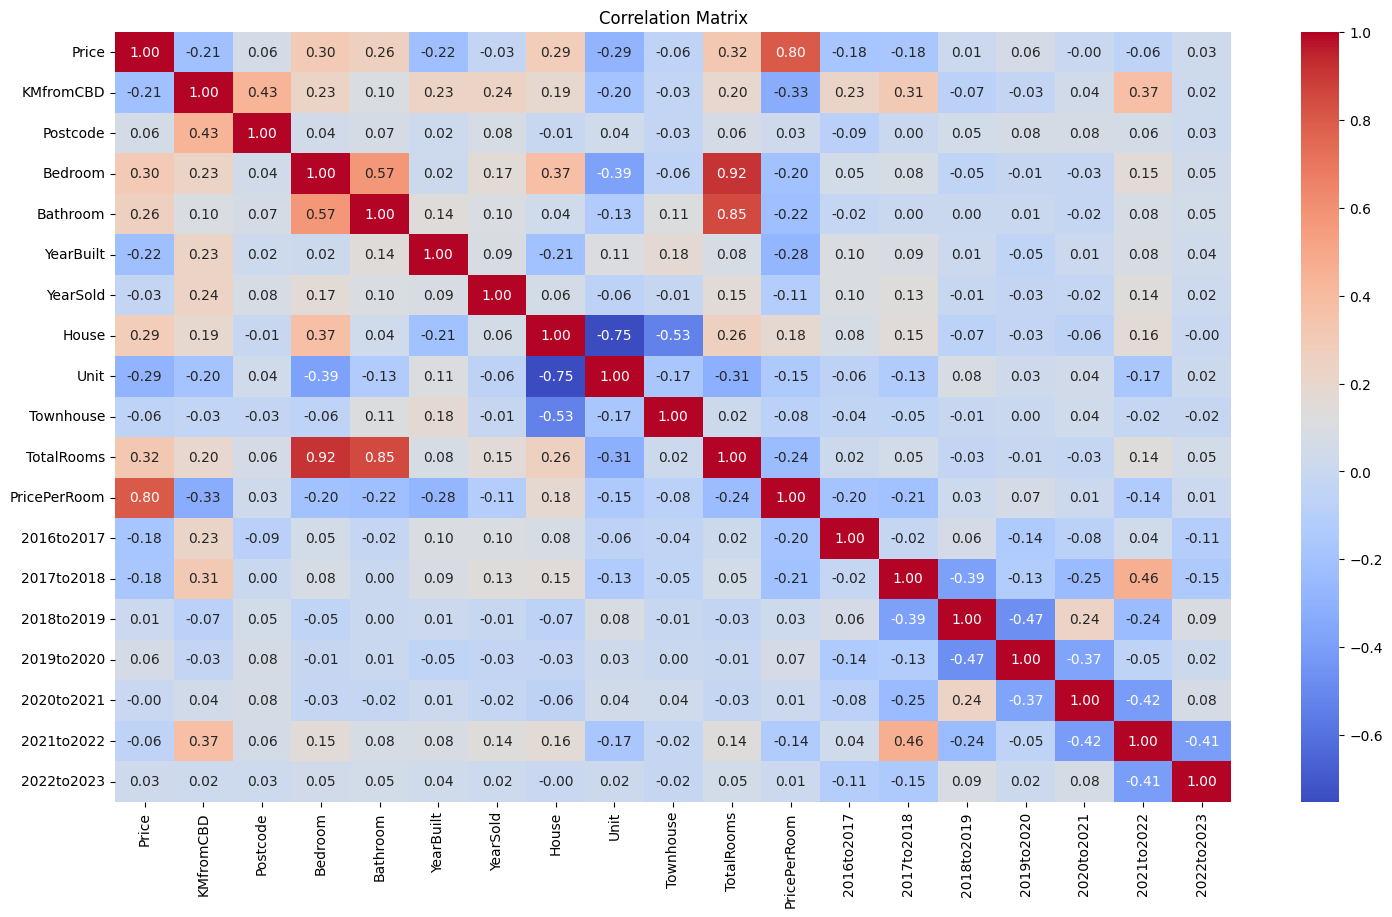

In [134]:
# Correlation Matrix Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='TotalRooms', ylabel='count'>

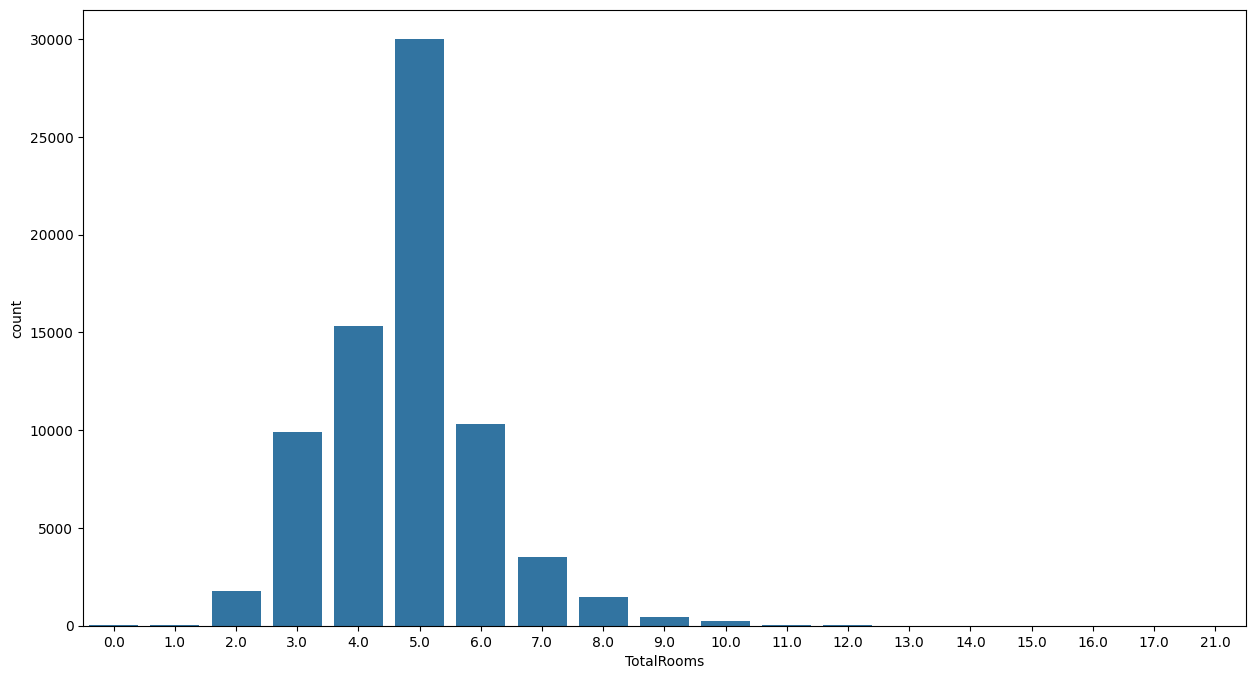

In [135]:
plt.figure(figsize = (15,8))
sns.countplot(x="TotalRooms", data=data)

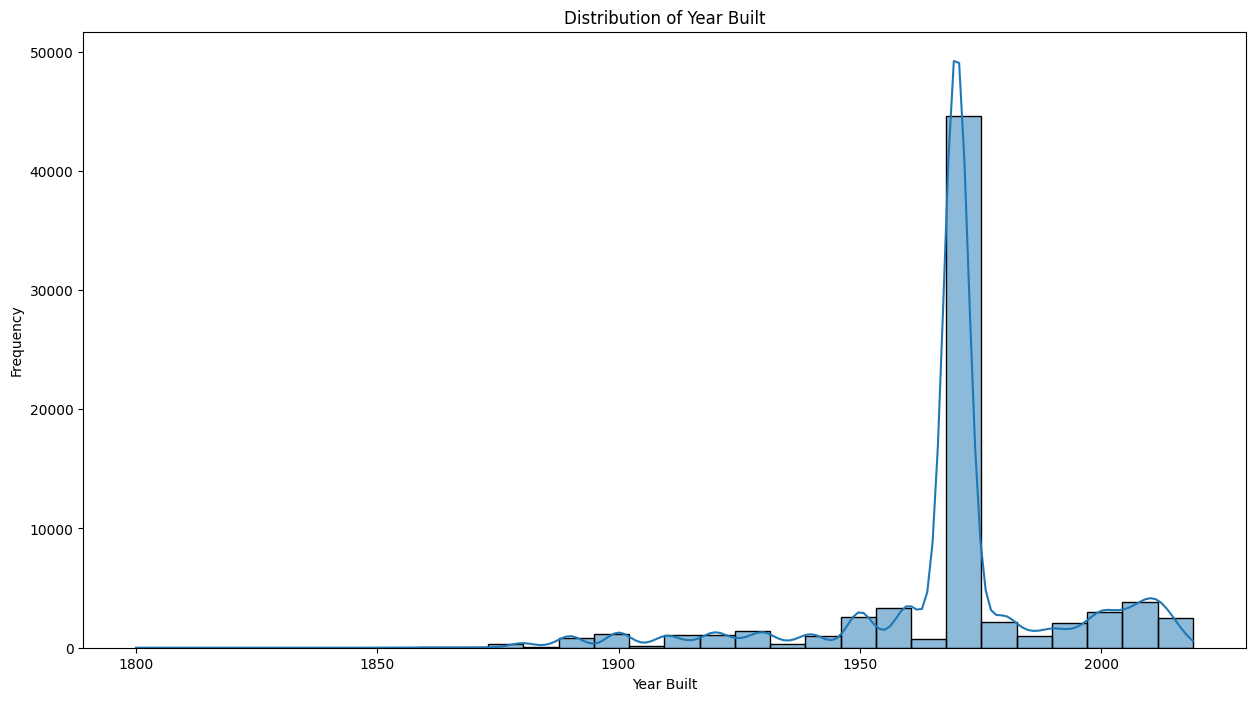

In [136]:
plt.figure(figsize=(15, 8))
sns.histplot(data['YearBuilt'], bins=30, kde=True)
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

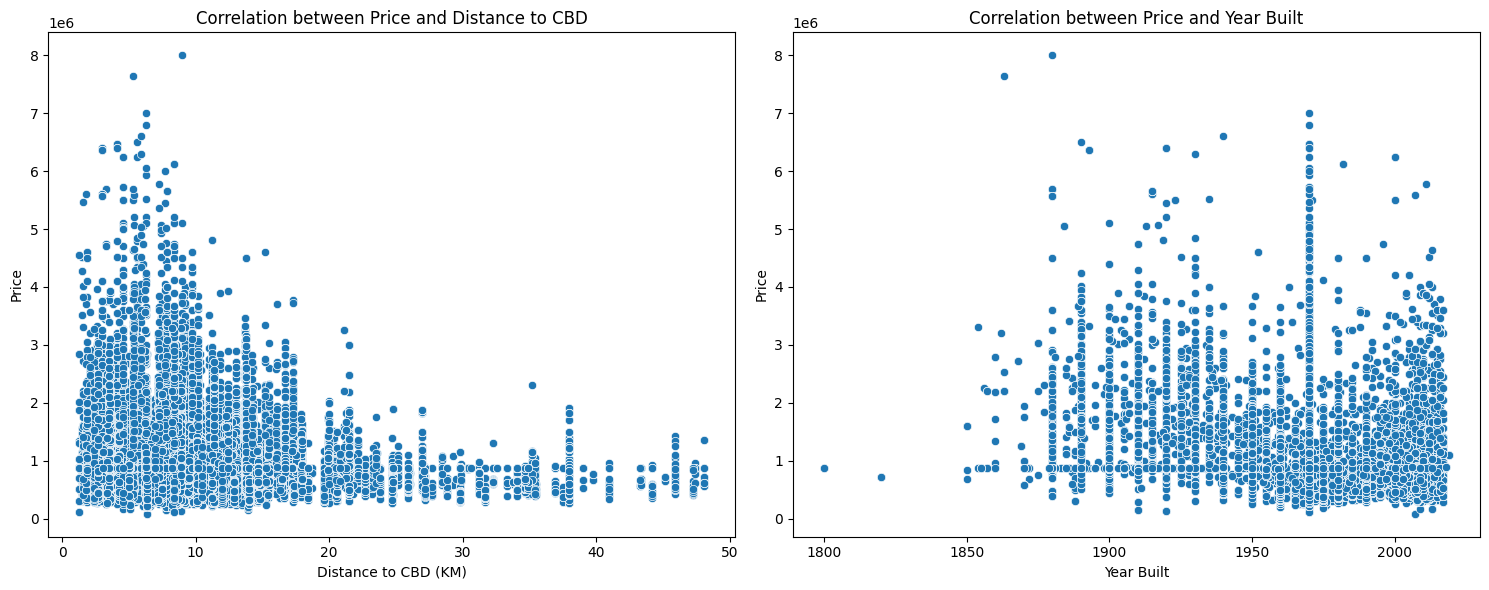

In [137]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Correlation between Price and KMtfromCBD
sns.scatterplot(x='KMfromCBD', y='Price', data=data, ax=axes[0])
axes[0].set_title('Correlation between Price and Distance to CBD')
axes[0].set_xlabel('Distance to CBD (KM)')
axes[0].set_ylabel('Price')

# Correlation between Price and YearBuilt
sns.scatterplot(x='YearBuilt', y='Price', data=data, ax=axes[1])
axes[1].set_title('Correlation between Price and Year Built')
axes[1].set_xlabel('Year Built')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

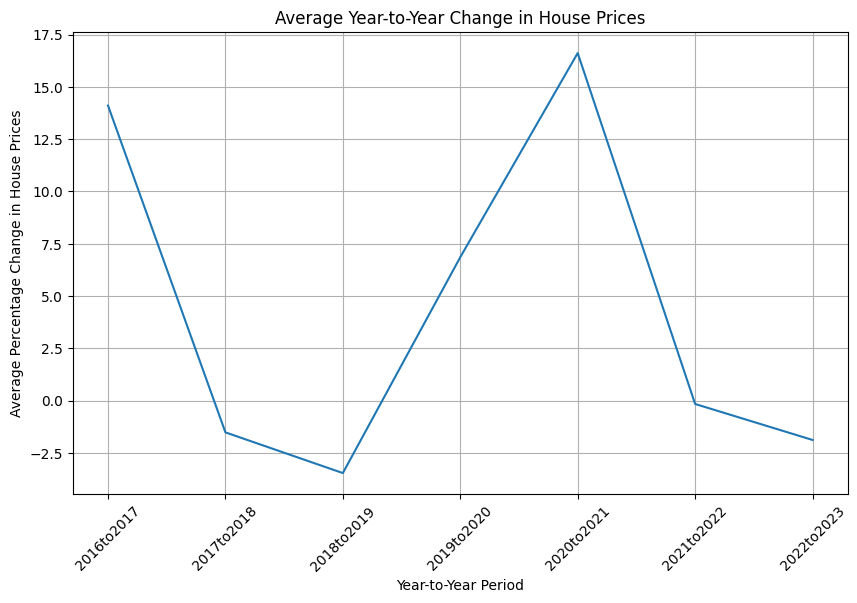

In [138]:
# Select the columns representing year-to-year percentage changes
year_to_year_columns = [col for col in data.columns if 'to' in col]

# Calculate the average percentage change for each year
average_changes = data[year_to_year_columns].mean()

# Create a line plot of the average changes
plt.figure(figsize=(10, 6))
plt.plot(average_changes.index, average_changes.values)
plt.xlabel('Year-to-Year Period')
plt.ylabel('Average Percentage Change in House Prices')
plt.title('Average Year-to-Year Change in House Prices')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## Data Normalization

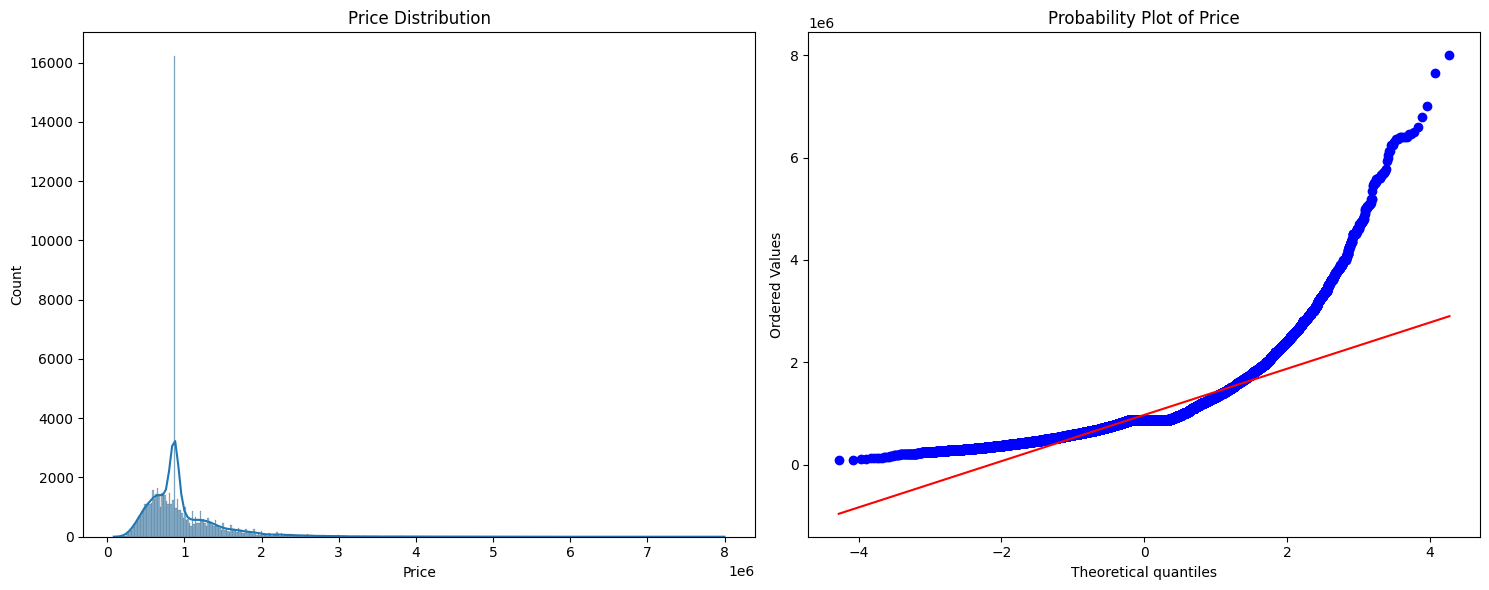

In [139]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram of Price
sns.histplot(data['Price'], kde=True, ax=axes[0])
axes[0].set_title('Price Distribution')

# Probability plot for the log-transformed Price
stats.probplot(data['Price'], dist="norm", plot=axes[1])
axes[1].set_title('Probability Plot of Price')

plt.tight_layout()
plt.show()


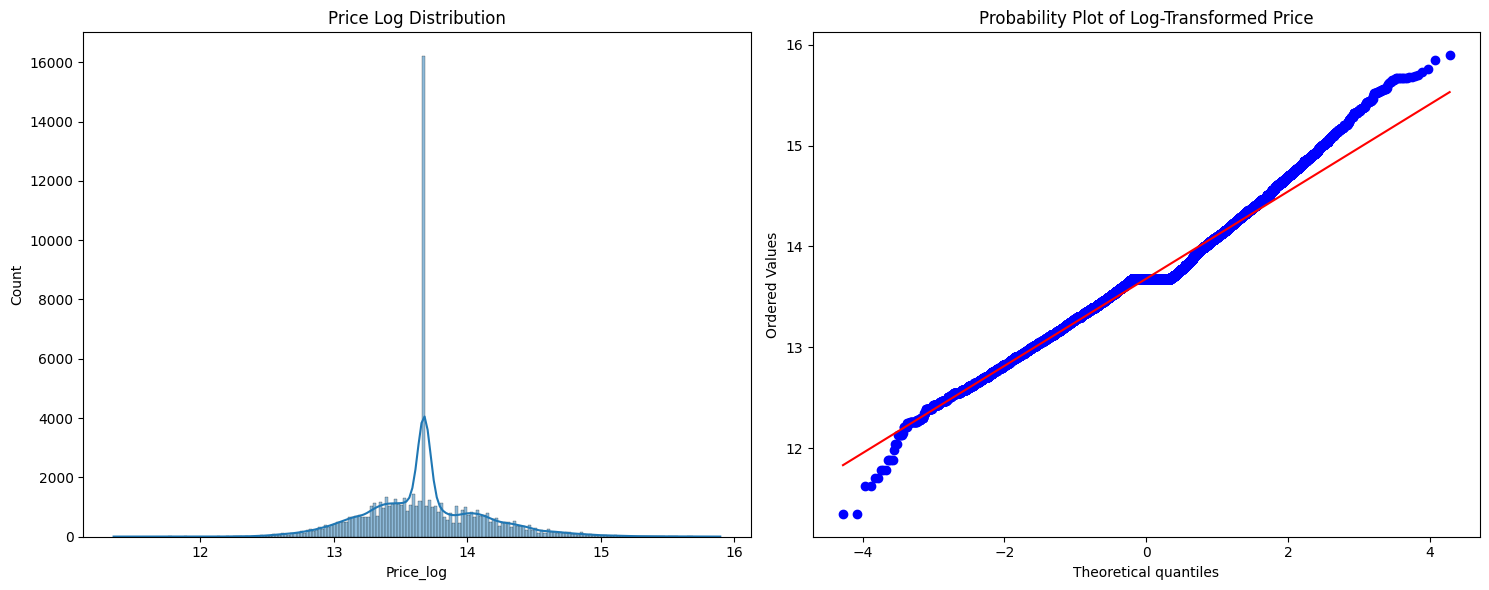

In [140]:
# Log transform the Price column
data['Price_log'] = np.log(data['Price'] + 1)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram of Price
sns.histplot(data['Price_log'], kde=True, ax=axes[0])
axes[0].set_title('Price Log Distribution')

# Probability plot for the log-transformed Price
stats.probplot(data['Price_log'], dist="norm", plot=axes[1])
axes[1].set_title('Probability Plot of Log-Transformed Price')

plt.tight_layout()
plt.show()

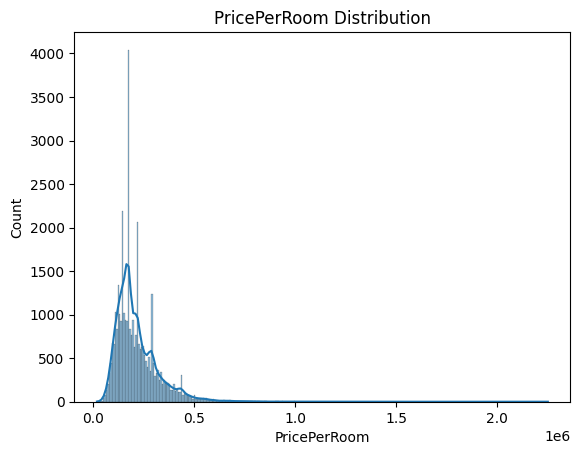

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


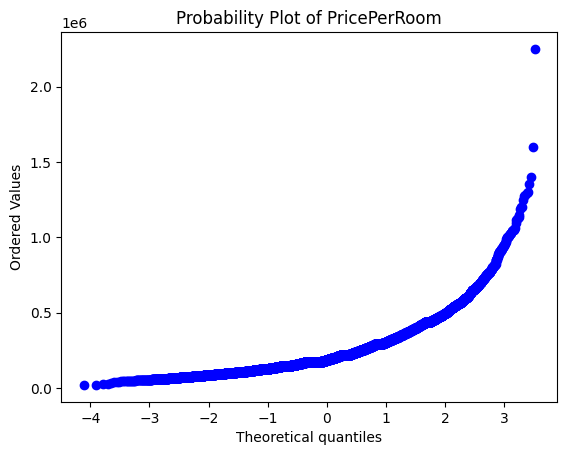

In [141]:
# Histogram of Price
sns.histplot(house_df['PricePerRoom'], kde=True)
plt.title('PricePerRoom Distribution')
plt.show()

# Probability plot for the log-transformed Price
stats.probplot(house_df['PricePerRoom'], dist="norm", plot=plt)
plt.title('Probability Plot of PricePerRoom')
plt.show()

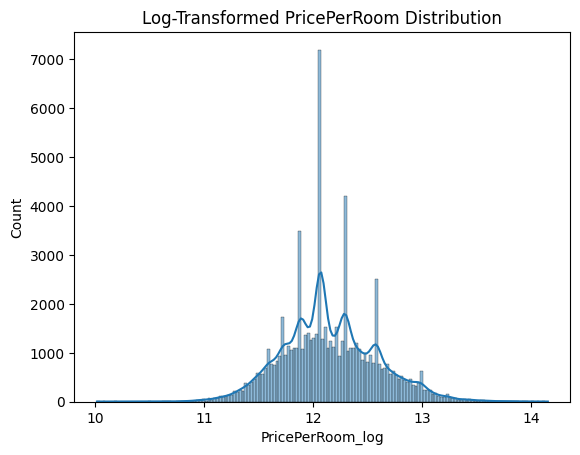

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


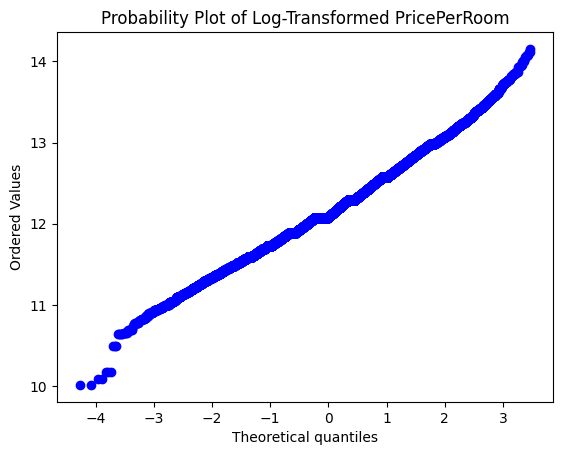

In [142]:
# Log transform the Price column
data['PricePerRoom_log'] = np.log(data['PricePerRoom'] + 1)

# Visualize the log-transformed data
sns.histplot(data['PricePerRoom_log'], kde=True)
plt.title('Log-Transformed PricePerRoom Distribution')
plt.show()

# Probability plot for the log-transformed Price
stats.probplot(data['PricePerRoom_log'], dist="norm", plot=plt)
plt.title('Probability Plot of Log-Transformed PricePerRoom')
plt.show()

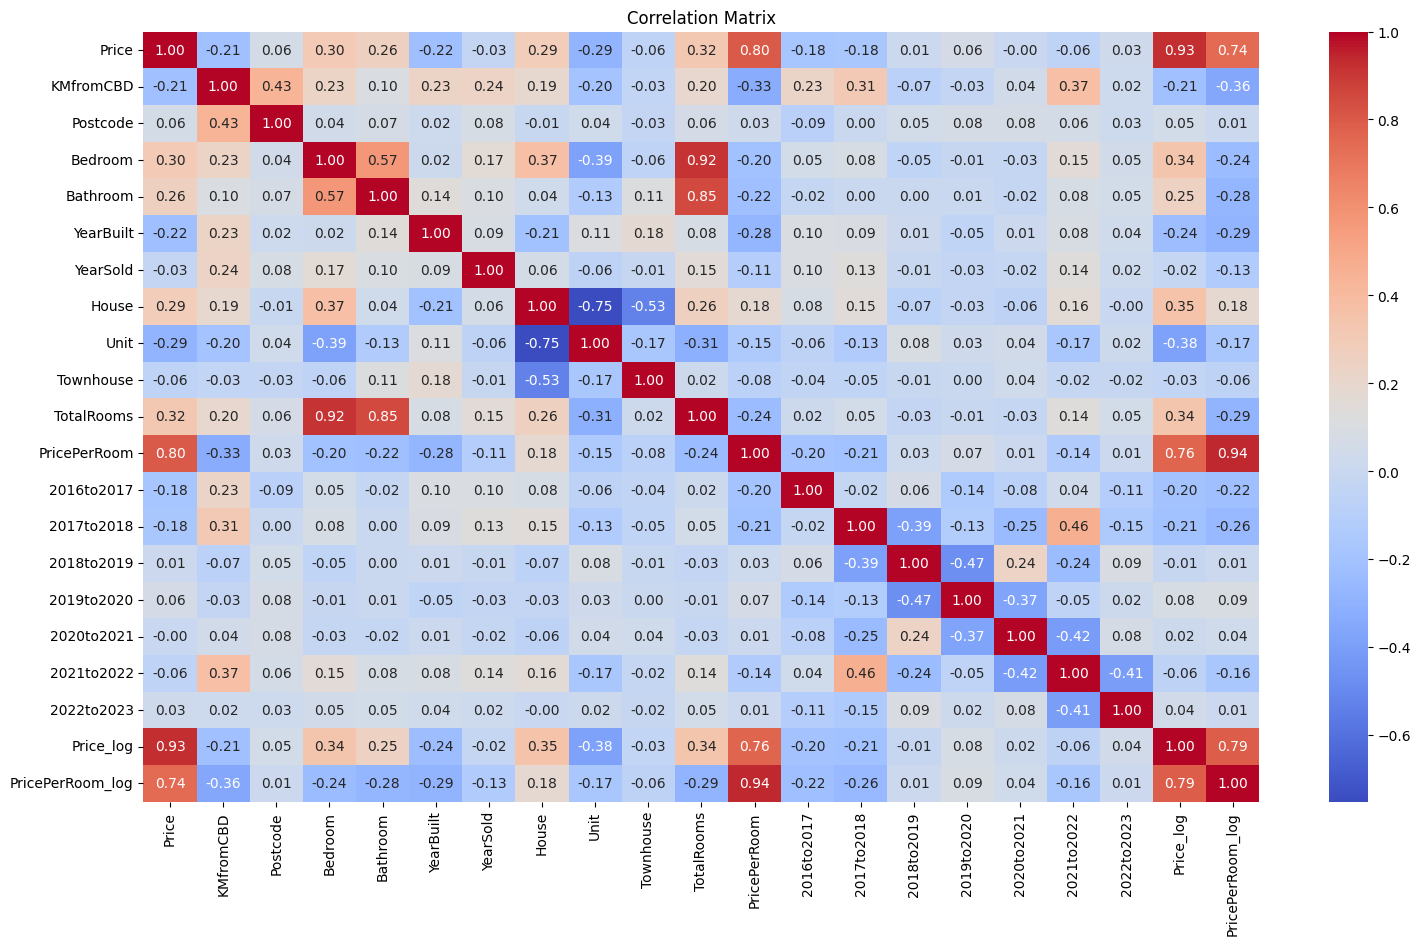

In [143]:
# Correlation Matrix Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Data Outlier

In [144]:
# Value < Q1 - 1,5*IQR OR Value > Q3 + 1,5 * IQR
def finding_outliers(data, variable_name) :
    iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
    lower =  data[variable_name].quantile(0.25) -1.5*iqr
    upper =  data[variable_name].quantile(0.75) + 1.5*iqr
    return data [(data[variable_name] < lower) | (data[variable_name] > upper)]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Price'>

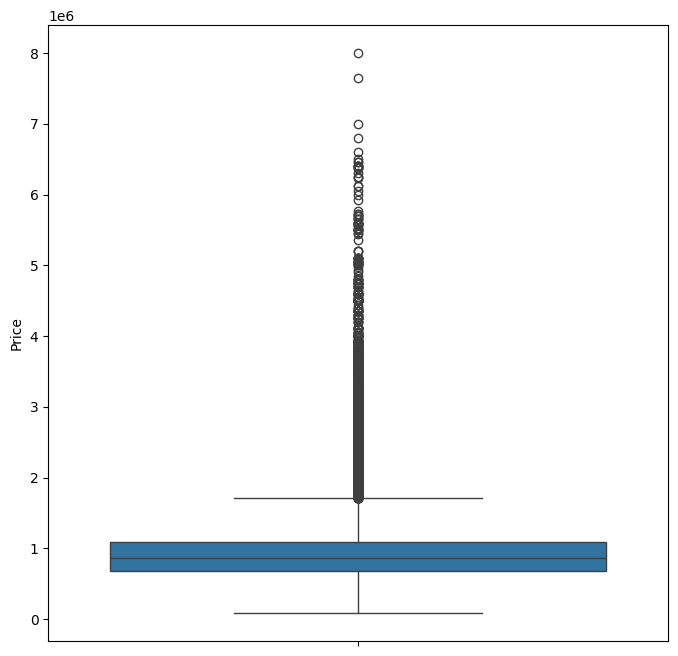

In [145]:
# Price boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Price", data=data)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Price'>

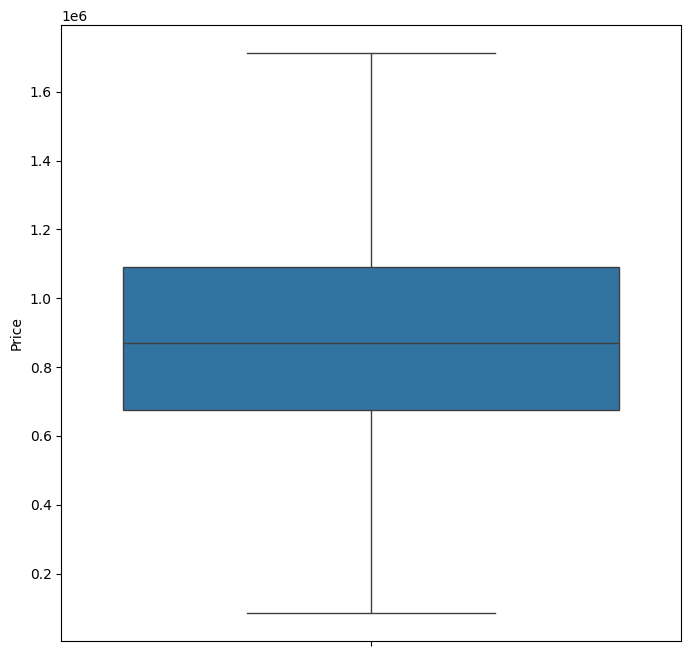

In [146]:
# # Price outliers
finding_outliers(data, "Price").sort_values("Price")

# For price
iqr_price = data["Price"].quantile(0.75) - data["Price"].quantile(0.25)
data["Price"].quantile(0.75) + 1.5 * iqr_price
data.loc[(finding_outliers(data, "Price").index, "Price")] = data["Price"].quantile(0.75) + 1.5 * iqr_price

# Price boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Price", data=data)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='PricePerRoom'>

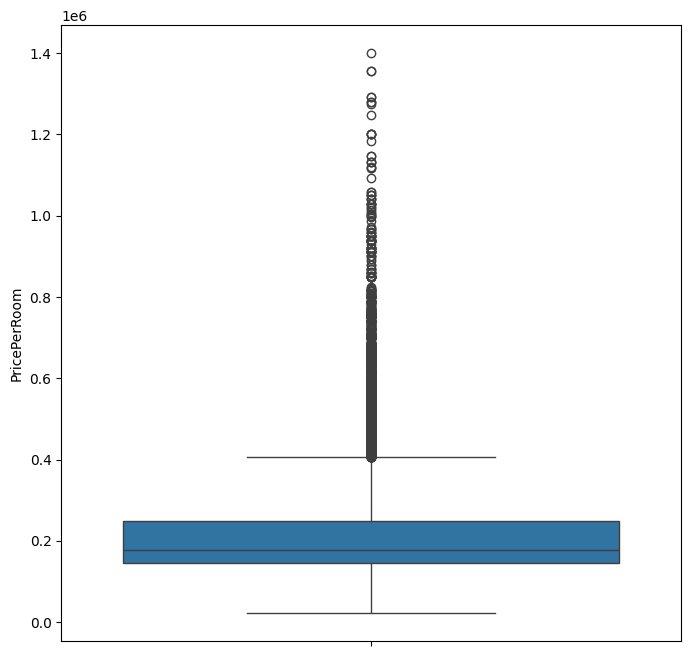

In [147]:
# Price boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="PricePerRoom", data=data)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='PricePerRoom'>

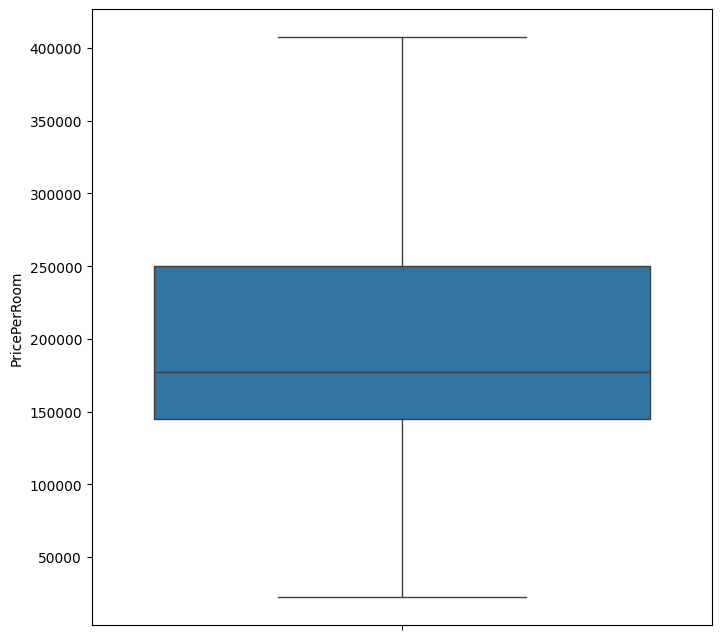

In [148]:
# PricePerRoom outliers
finding_outliers(data, "PricePerRoom").sort_values("PricePerRoom")

# For PricePerRoom
iqr_price = data["PricePerRoom"].quantile(0.75) - data["PricePerRoom"].quantile(0.25)
data["PricePerRoom"].quantile(0.75) + 1.5 * iqr_price
data.loc[(finding_outliers(data, "PricePerRoom").index, "PricePerRoom")] = data["PricePerRoom"].quantile(0.75) + 1.5 * iqr_price

# PricePerRoom boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="PricePerRoom", data=data)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='TotalRooms'>

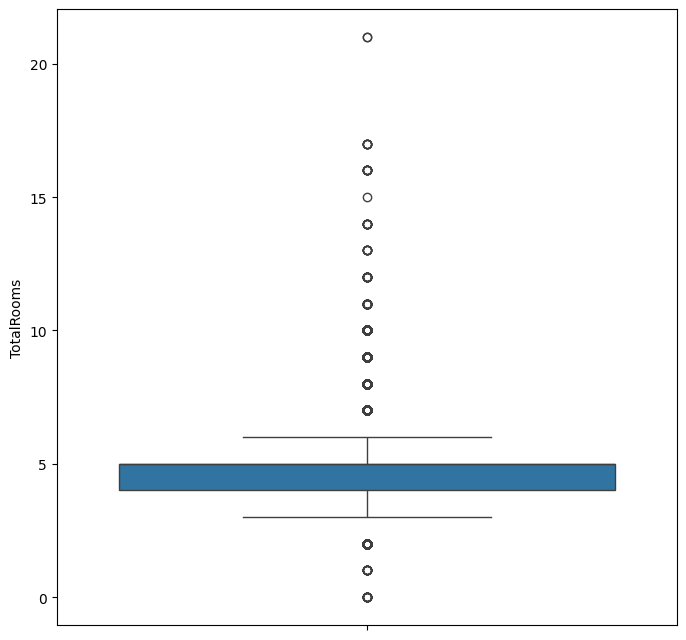

In [149]:
# rooms boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="TotalRooms", data=data)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='TotalRooms'>

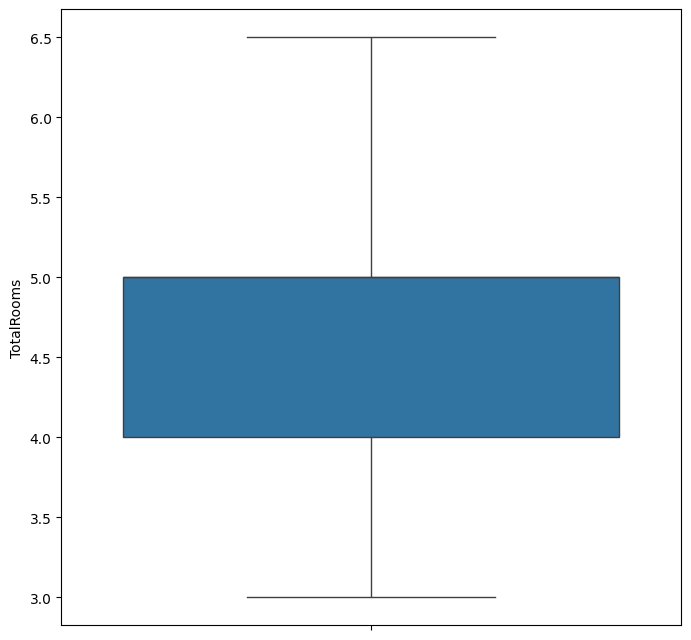

In [150]:
# TotalRooms outliers
finding_outliers(data, "TotalRooms").sort_values("TotalRooms")

# For TotalRooms
iqr_price = data["TotalRooms"].quantile(0.75) - data["TotalRooms"].quantile(0.25)
data["TotalRooms"].quantile(0.75) + 1.5 * iqr_price
data.loc[(finding_outliers(data, "TotalRooms").index, "TotalRooms")] = data["TotalRooms"].quantile(0.75) + 1.5 * iqr_price

# room boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="TotalRooms", data=data)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='TotalRooms', ylabel='Price'>

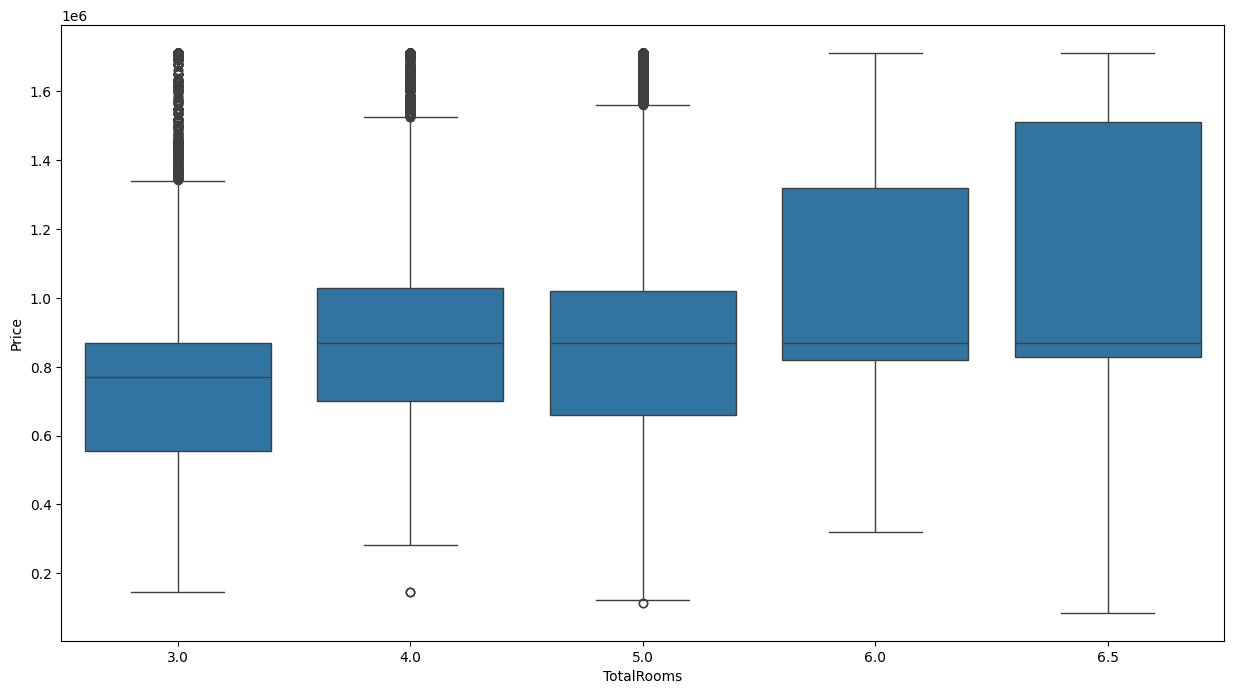

In [151]:
# Plot Bathroom vs Price
plt.figure(figsize=(15,8))
sns.boxplot(x="TotalRooms", y="Price", data=data)

# **Machine Learning**

In [152]:
df = data.copy()

## Data Preparation

In [154]:
def classify_price_change(row, column):
    if row[column] < 0:
        return 'Price will drop'
    elif row[column] >= 20:
      return 'Price will go up significantly ( 20% or more )'
    elif row[column] >= 5:
        return 'Price goes up slightly ( 5% or more )'
    else:
        return 'No significant change'

# Apply the function to the desired year (for example, 2022 to 2023)
df['price_class_22_23'] = df.apply(classify_price_change, axis=1, column='2022to2023')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply the label encoder to the 'price_class' column
df['price_class_encoded'] = label_encoder.fit_transform(df['price_class_22_23'])

### Regression preperation

In [155]:
X_reg = df.drop(columns=['Price', 'Price_log', 'PricePerRoom_log', 'PricePerRoom','2016to2017','2017to2018','2018to2019', '2019to2020','2020to2021','2021to2022','2022to2023', 'price_class_encoded', 'price_class_22_23'])
y_reg = df['Price_log']  # Using price as the target

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

### Classification preperation

In [156]:

# Features for the model (exclude the original 'price_class' column and use the encoded version)
X_clf = df.drop(['price_class_22_23','price_class_encoded','Price','PricePerRoom','2016to2017','2017to2018','2018to2019','2020to2021','2021to2022','2022to2023','Price_log','PricePerRoom_log'], axis=1)  # Your features
y_clf = df['price_class_encoded']  # Encoded target

# Split the data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

In [157]:
df

,Price,KMfromCBD,Postcode,Bedroom,Bathroom,YearBuilt,YearSold,House,Unit,Townhouse,...,2017to2018,2018to2019,2019to2020,2020to2021,2021to2022,2022to2023,Price_log,PricePerRoom_log,price_class_22_23,price_class_encoded
0,870000.0,2.5,3067.0,2.0,1.0,1970.0,2016,1,0,0,...,-7.0,-12.0,14.0,14.0,-1.0,-7.0,13.676250,12.577640,Price will drop,2
1,1480000.0,2.5,3067.0,2.0,1.0,1970.0,2016,1,0,0,...,-7.0,-12.0,14.0,14.0,-1.0,-7.0,14.207553,13.108942,Price will drop,2
2,1035000.0,2.5,3067.0,2.0,1.0,1900.0,2016,1,0,0,...,-7.0,-12.0,14.0,14.0,-1.0,-7.0,13.849913,12.751303,Price will drop,2
3,870000.0,2.5,3067.0,3.0,2.0,1970.0,2016,0,1,0,...,-7.0,-12.0,14.0,14.0,-1.0,-7.0,13.676250,12.066816,Price will drop,2
4,1465000.0,2.5,3067.0,3.0,2.0,1900.0,2017,1,0,0,...,-7.0,-12.0,14.0,14.0,-1.0,-7.0,14.197366,12.587931,Price will drop,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73050,705000.0,6.3,3013.0,2.0,1.0,2000.0,2018,0,0,1,...,4.0,-7.0,6.0,15.0,2.0,-9.0,13.465955,12.367345,Price will drop,2
73051,1140000.0,6.3,3013.0,3.0,2.0,1970.0,2018,1,0,0,...,4.0,-7.0,6.0,15.0,2.0,-9.0,13.946540,12.337105,Price will drop,2
73052,1140000.0,6.3,3013.0,3.0,2.0,1970.0,2018,1,0,0,...,4.0,-7.0,6.0,15.0,2.0,-9.0,13.946540,12.337105,Price will drop,2
73053,1020000.0,6.3,3013.0,2.0,1.0,1930.0,2018,1,0,0,...,4.0,-7.0,6.0,15.0,2.0,-9.0,13.835314,12.736704,Price will drop,2


### Time-series-forecast preperation (EXPERIMENT)

In [158]:
# Calculate the base price for the year 2016
base_price = df[df['YearSold'] == 2016]['Price'].mean()  # Average price for properties sold in 2016
print(f'Base price for 2016: {base_price:.2f}')

# DataFrame containing percentage increases/decreases
data = {
    'Year': ['2016to2017', '2017to2018', '2018to2019', '2019to2020', '2020to2021', '2021to2022', '2022to2023'],
    'PriceChange': [14.106290, -1.516912, -3.462350, 6.859530, 16.616946, -0.159209, -1.879639]
}
df_changes = pd.DataFrame(data)

# Calculate future prices based on the price changes
price_series = [base_price]  # Starting with the base price from 2016
for change in df_changes['PriceChange']:
    new_price = price_series[-1] * (1 + change / 100)  # Calculate new price based on percentage change
    price_series.append(new_price)  # Append new price to the series

# Create a DataFrame with years and calculated prices
years = list(range(2016, 2024))  # Include years 2016 to 2023
# The years list was incorrectly created with years from 2016 to 2030.
# This has been corrected to be from 2016 to 2023 to match the number of items in price_series
price_df = pd.DataFrame({'Year': years, 'AvgPrice': price_series})
price_df.set_index('Year', inplace=True)

Base price for 2016: 934985.95


## Regression Model

### Linear Regression

In [159]:
X_train_reg

,KMfromCBD,Postcode,Bedroom,Bathroom,YearBuilt,YearSold,House,Unit,Townhouse,TotalRooms
62477,18.0,3037.0,3.0,2.0,1970.0,2018,1,0,0,5.0
31435,18.0,3037.0,6.0,4.0,1970.0,2017,1,0,0,6.5
3929,13.9,3165.0,3.0,2.0,1970.0,2016,0,0,1,5.0
45636,7.5,3040.0,1.0,1.0,1970.0,2017,0,1,0,6.5
20427,1.9,3003.0,2.0,2.0,1900.0,2016,0,0,1,4.0
...,...,...,...,...,...,...,...,...,...,...
37194,14.7,3030.0,3.0,1.0,1970.0,2017,1,0,0,4.0
6265,13.9,3108.0,4.0,2.0,1970.0,2016,1,0,0,6.0
54886,20.6,3064.0,4.0,2.0,1970.0,2017,1,0,0,6.0
860,11.1,3025.0,3.0,2.0,1970.0,2016,1,0,0,5.0


In [160]:
# Initialize the model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train_reg, y_train_reg)

LinearRegression()

In [161]:
# Make predictions
y_pred_linear = linear_reg.predict(X_test_reg)

# Evaluate the model
mae_linear = mean_absolute_error(y_test_reg, y_pred_linear)
mse_linear = mean_squared_error(y_test_reg, y_pred_linear)
r2_linear = r2_score(y_test_reg, y_pred_linear)

print('Linear Regression Performance:')
print(f'MAE: {mae_linear:.4f}')
print(f'MSE: {mse_linear:.4f}')
print(f'R² Score: {r2_linear:.4f}')


Linear Regression Performance:
MAE: 0.2697
MSE: 0.1198
R² Score: 0.3856


### Random Forest Regressor

In [162]:
# Initialize the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train_reg, y_train_reg)


RandomForestRegressor(random_state=42)

In [163]:
# Make predictions
y_pred_rf = rf_reg.predict(X_test_reg)

# Evaluate the model
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

print('\nRandom Forest Regressor Performance:')
print(f'MAE: {mae_rf:.4f}')
print(f'MSE: {mse_rf:.4f}')
print(f'R² Score: {r2_rf:.4f}')



Random Forest Regressor Performance:
MAE: 0.1620
MSE: 0.0600
R² Score: 0.6921


### Gradient Boosting Regressor

In [164]:
# Initialize the model
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_reg.fit(X_train_reg, y_train_reg)


GradientBoostingRegressor(random_state=42)

In [165]:
# Make predictions
y_pred_gb = gb_reg.predict(X_test_reg)

# Evaluate the model
mae_gb = mean_absolute_error(y_test_reg, y_pred_gb)
mse_gb = mean_squared_error(y_test_reg, y_pred_gb)
r2_gb = r2_score(y_test_reg, y_pred_gb)

print('\nGradient Boosting Regressor Performance:')
print(f'MAE: {mae_gb:.4f}')
print(f'MSE: {mse_gb:.4f}')
print(f'R² Score: {r2_gb:.4f}')


Gradient Boosting Regressor Performance:
MAE: 0.2236
MSE: 0.0865
R² Score: 0.5561


### Decision Tree Regressor

In [166]:
# Initialize the model
dt_reg = DecisionTreeRegressor(random_state=42)

# Train the model
dt_reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(random_state=42)

In [167]:
# Make predictions
y_pred_dt = dt_reg.predict(X_test_reg)

# Evaluate the model
mae_dt = mean_absolute_error(y_test_reg, y_pred_dt)
mse_dt = mean_squared_error(y_test_reg, y_pred_dt)
r2_dt = r2_score(y_test_reg, y_pred_dt)

print('\nDecision Tree Regressor Performance:')
print(f'MAE: {mae_dt:.4f}')
print(f'MSE: {mse_dt:.4f}')
print(f'R² Score: {r2_dt:.4f}')


Decision Tree Regressor Performance:
MAE: 0.1520
MSE: 0.0641
R² Score: 0.6714


## Visualize Regression ML

In [168]:
def plot_predicted_vs_actual(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Log Price')
    plt.ylabel('Predicted Log Price')
    plt.title(f'{model_name}: Predicted vs. Actual Log Prices')
    plt.show()

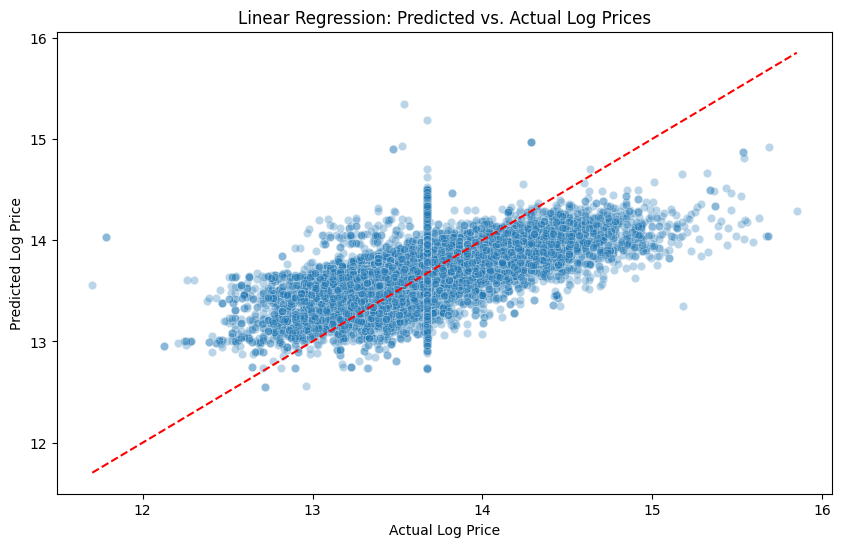

In [169]:
plot_predicted_vs_actual(y_test_reg, y_pred_linear, 'Linear Regression')

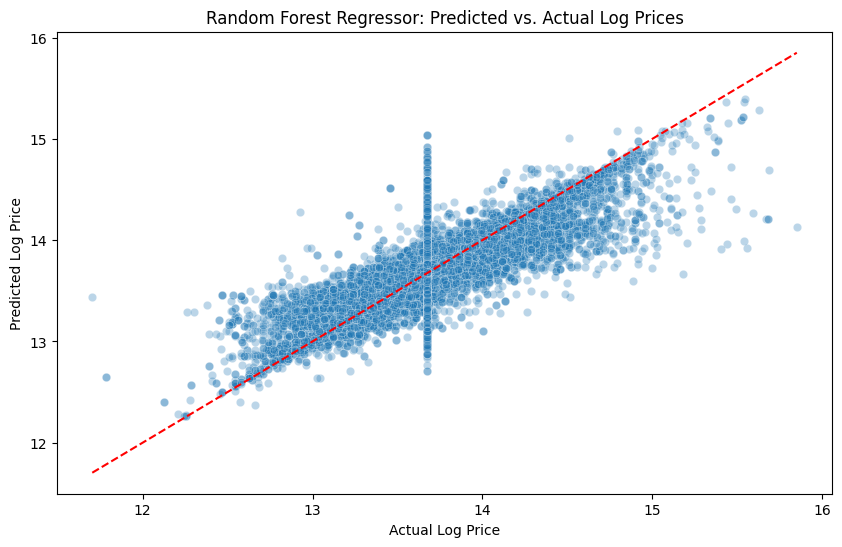

In [170]:
plot_predicted_vs_actual(y_test_reg, y_pred_rf, 'Random Forest Regressor')

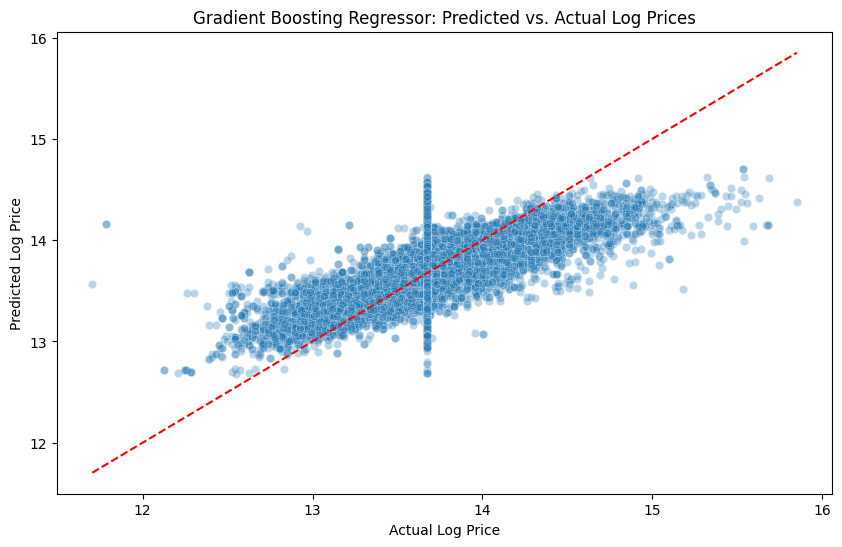

In [171]:
plot_predicted_vs_actual(y_test_reg, y_pred_gb, 'Gradient Boosting Regressor')

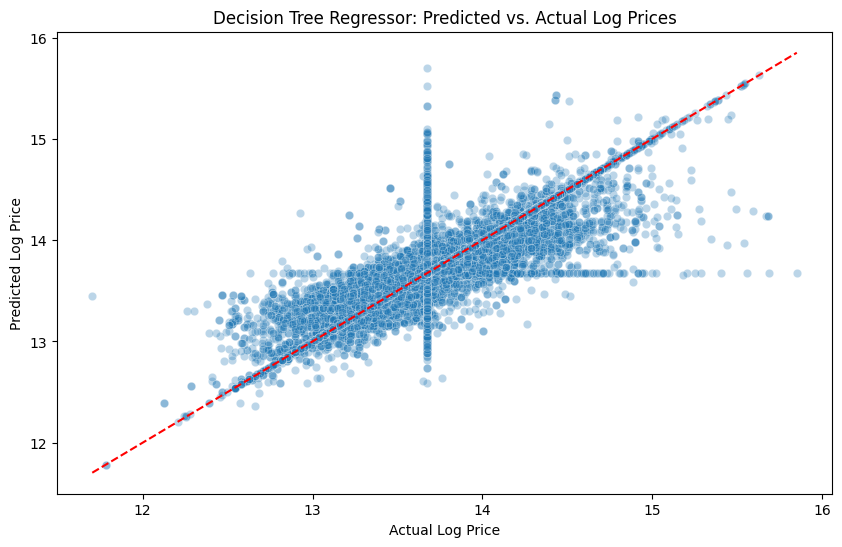

In [172]:
plot_predicted_vs_actual(y_test_reg, y_pred_dt, 'Decision Tree Regressor')

## Classification Model

### Logistic Regression

In [173]:
# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_clf, y_train_clf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [174]:
# Make predictions
y_pred_log = log_reg.predict(X_test_clf)

# Evaluate the model
acc_log = accuracy_score(y_test_clf, y_pred_log)

# Use 'weighted' average for multiclass precision
prec_log = precision_score(y_test_clf, y_pred_log, average='weighted')
rec_log = recall_score(y_test_clf, y_pred_log, average='weighted')
f1_log = f1_score(y_test_clf, y_pred_log, average='weighted')

print('Logistic Regression Performance:')
print(f'Accuracy: {acc_log:.4f}')
print(f'Precision: {prec_log:.4f}')
print(f'Recall: {rec_log:.4f}')
print(f'F1 Score: {f1_log:.4f}')

Logistic Regression Performance:
Accuracy: 0.6599
Precision: 0.6483
Recall: 0.6599
F1 Score: 0.5327


### Random Forest Classifier

In [175]:
# Initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

In [176]:
# Make predictions
y_pred_rf_clf = rf_clf.predict(X_test_clf)

# Evaluate the model
acc_rf_clf = accuracy_score(y_test_clf, y_pred_rf_clf)
# Use 'weighted' average for multiclass precision
prec_rf_clf = precision_score(y_test_clf, y_pred_log, average='weighted')
rec_rf_clf = recall_score(y_test_clf, y_pred_rf_clf, average ='weighted')
f1_rf_clf = f1_score(y_test_clf, y_pred_rf_clf, average ='weighted')

print('\nRandom Forest Classifier Performance:')
print(f'Accuracy: {acc_rf_clf:.4f}')
print(f'Precision: {prec_rf_clf:.4f}')
print(f'Recall: {rec_rf_clf:.4f}')
print(f'F1 Score: {f1_rf_clf:.4f}')



Random Forest Classifier Performance:
Accuracy: 0.9657
Precision: 0.6483
Recall: 0.9657
F1 Score: 0.9656


## Visualize Classification ML

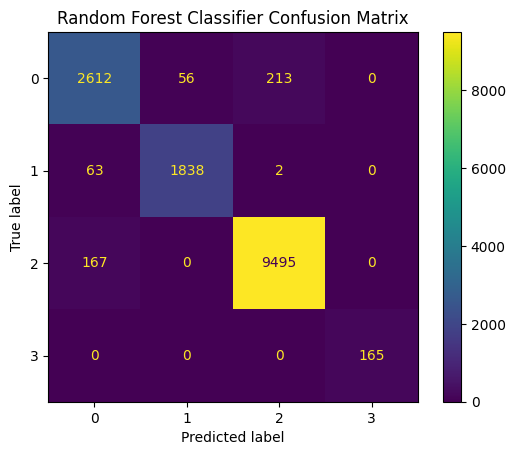

In [177]:
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test_clf, y_test_clf)
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

## Time Series Forecasting Model (EXPIREMENT)

In [178]:
# Model Fitting
model = sm.tsa.ARIMA(price_df['AvgPrice'], order=(1, 1, 1))  # Adjust order based on your data
results = model.fit()

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               AvgPrice   No. Observations:                    8
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -88.311
Date:                Thu, 03 Oct 2024   AIC                            182.623
Time:                        14:10:07   BIC                            182.460
Sample:                             0   HQIC                           180.617
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0912      3.189     -0.029      0.977      -6.342       6.160
ma.L1          0.2465      2.922      0.084      0.933      -5.481       5.974
sigma2      6.491e+09   2.39e-10   2.72e+19      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


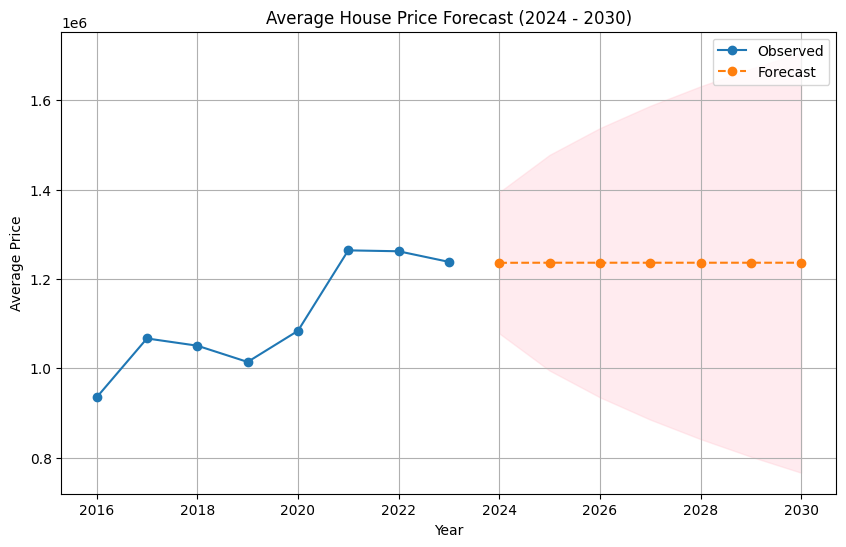

In [179]:
# Forecast the next 7 years (2024 to 2030)
forecast = results.get_forecast(steps=7)
forecast_index = range(price_df.index[-1] + 1, price_df.index[-1] + 8)
forecast_df = forecast.summary_frame()
forecast_df['Year'] = forecast_index
forecast_df.set_index('Year', inplace=True)

# Combine actual and forecasted data
combined_df = pd.concat([price_df, forecast_df[['mean']]], axis=0)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(price_df.index, price_df['AvgPrice'], label='Observed', marker='o')
plt.plot(forecast_index, forecast_df['mean'], label='Forecast', marker='o', linestyle='--')
plt.fill_between(forecast_index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title('Average House Price Forecast (2024 - 2030)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid()
plt.show()